In [12]:
import pandas as pd
import numpy as np
import pandas as pd
from scipy import stats, integrate
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(color_codes=True)
from __future__ import print_function
import numpy as np
import statsmodels.api as sm
from scipy import stats
import tensorflow as tf
from scipy.special import factorial
from copy import deepcopy

# Set logging
import logging

logging.basicConfig(level=logging.INFO)
logger = logging.getLogger('glm')

from matplotlib import pyplot as plt
plt.style.use('fivethirtyeight')
%matplotlib inline

files = ["data_1_1.csv", "data_1_2.csv", "data_1_3.csv", "data_1_4.csv", "data_1_5.csv"]

    
def xy_op(file_index):
    
    file_name = files[file_index]
    
    logger.info("reading file {}".format(file_name))
    df = pd.read_csv(file_name)
    exog = df['x'].as_matrix()
    endo = df['y'].as_matrix()
    
    ones = np.ones((endo.shape[0], 1), dtype=np.float32)
    scalar_one = np.ones((1, 1), dtype=np.float32)
    
    x = np.concatenate((exog, ones), axis=1)
    logger.info("shape of [X] is {}".format(x.shape))
    logger.debug("[X] is {}".format(x[:3]))

    Y = endo
    logger.info("shape of [Y] is {}".format(Y.shape))
    logger.debug("[Y] is {}".format(Y[:3]))

    return (x, Y)

pyglmnet

In [7]:
from pyglmnet import GLM
import scipy.sparse as sps
from sklearn.preprocessing import StandardScaler

# create an instance of the GLM class
glm = GLM(distr='poisson')

n_samples, n_features = 100, 1

# sample random coefficients
beta0 = np.random.normal(0.0, 1.0, 1)
beta = sps.rand(n_features, 1, 0.1)
beta = np.array(beta.todense())

X_train = np.resize(df['x'].as_matrix(), (n_samples, 1))
y_train = df['y'].as_matrix()

# fit the model on the training data
scaler = StandardScaler().fit(X_train)
glm.fit(scaler.transform(X_train), y_train)

<
Distribution | poisson
alpha | 0.50
max_iter | 1000.00
lambda: 0.50 to 0.01
>

INFO:glm:shape of [X] is (100, 2)
INFO:glm:shape of [Y] is (100, 1)
INFO:glm:B1 = 47.621350363
INFO:glm:B0 = -72.6327329951


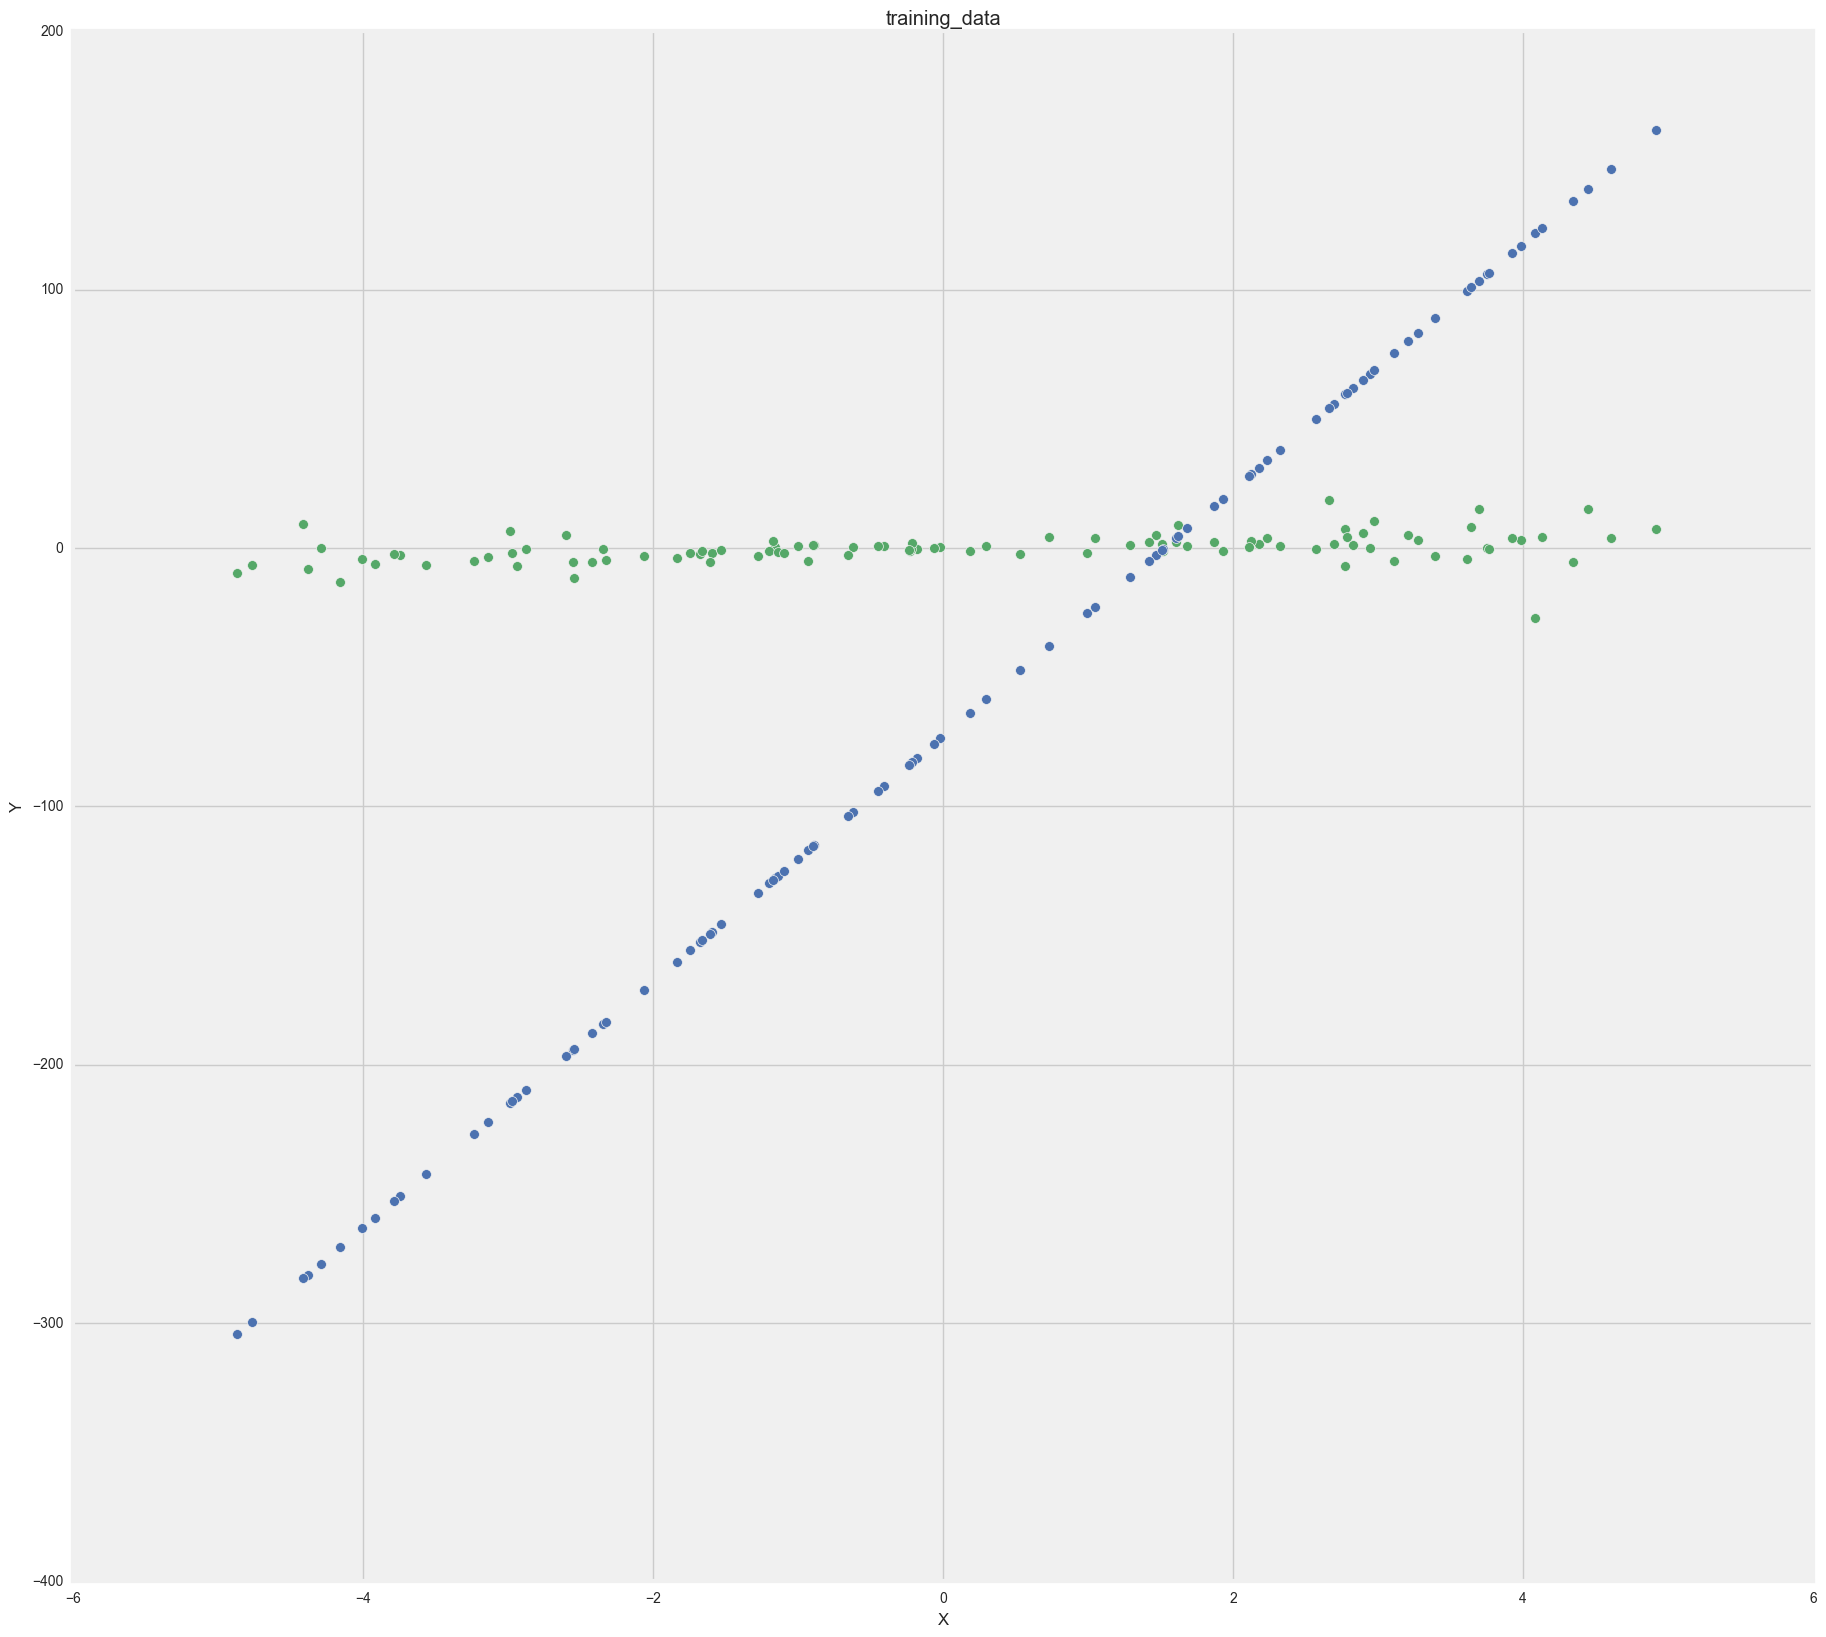

In [8]:
(x, y) = xy_op()

b1 = glm.fit_[-1]['beta'][0][0]
b0 = glm.fit_[-1]['beta0'][0]
logger.info("B1 = {}".format(b1))
logger.info("B0 = {}".format(b0))
fig = plt.figure(figsize=(20, 20))
ax = fig.add_subplot(111)
ax.scatter(x[:, 0], y[:, 0], s=50, c='g')
ax.scatter(x[:, 0], np.copy(np.matmul(x, np.transpose(np.array([[b1, b0]])))), s=50, c='b')
ax.set_ylabel("Y")
ax.set_xlabel('X')
ax.set_title("training_data")
ax.legend() 

fig.show()

In [2]:
class Options(object):
    """Options used by model."""

    def __init__(self):
        # Model options.

        self.input_dim = 1

        self.output_dim = 1

        # The initial learning rate.
        self.learning_rate = 0.1

        # Number of examples for one training step.
        self.batch_size = 100

        # Maximum Epochs
        self.epochs_to_train = 10000

        # Early Stop
        self.tolerance = 1e-2

        
def n_op(x, beta):
    """
    """
    return np.copy(np.matmul(x, np.transpose(b)))


def mu_op(n, link='log'):
    """
    """
    if(link=='log'):        
        # mu increases linearly after exp_limit
        exp_limit = 5.0
        slope = np.exp(exp_limit)
        intercept = (1 - exp_limit) * slope
        
        mu = deepcopy(n)
        mu[n > exp_limit] = n[n > exp_limit] * slope + intercept
        mu[n <= exp_limit] = np.exp(n[n <= exp_limit])
        dmu_dn = deepcopy(mu)    
    else:
        mu = np.exp(n)
        dmu_dn = np.exp(n)
        
    return mu, dmu_dn


def gradhess_logloss_1d(x, y, n):
        """
        Computes gradient (1st derivative)
        and Hessian (2nd derivative)
        of log likelihood for a single coordinate
        Parameters
        ----------
        xk: float
            n_samples x 1
        y: float
            n_samples x n_classes
        Returns
        -------
        gk: float:
            n_classes
        hk: float:
            n_classes
        """
        mu = qu(z)
        s = expit(z)
        gk = np.sum((mu[z <= self.eta] - y[z <= self.eta]) *
                    xk[z <= self.eta]) + \
            self.eta * np.sum((1 - y[z > self.eta] / mu[z > self.eta]) *
                              xk[z > self.eta])
        hk = np.sum(mu[z <= self.eta] * xk[z <= self.eta] ** 2) - \
            np.exp(self.eta) * (1 - self.eta) * \
            np.sum(y[z > self.eta] / (mu[z > self.eta] ** 2) *
                   (xk[z > self.eta] ** 2))
            
def UI_op(n, dn_db, y, link='log', dist='poisson'):

    # Get mean and its derivative of mean
    mu, dmu_dn = mu_op(n)
    
    # Set the variance as a function of mu        
    a_phi = None
    dispersion = None
    var_mu = None
    if(dist=='poisson'):        
        a_phi = scalar_one
        dispersion = scalar_one
        var_mu = 1.0*mu
    else:
        a_phi = scalar_one
        dispersion = scalar_one
        var_mu = 1.0*mu

    # Calculate U 
    U = np.add.reduce(np.subtract(y, mu)*\
                      np.divide(scalar_one, a_phi)*\
                      np.divide(ones, var_mu)*\
                      dmu_dn*\
                      dn_db, 0)
    logger.debug("[U] is {}".format(U[:3]))
    
    I = np.add.reduce(dn_db*\
                      np.divide(1.0, a_phi)*\
                      np.divide(1.0, var_mu)*\
                      dmu_dn*\
                      dn_db, 0)
    
    logger.debug("[I] is {}".format(I[:3]))
    
    return deepcopy(U), deepcopy(I)


def b_delta_op(learning_rate, U, I):
    b_delta = np.copy(learning_rate*(np.divide(1.0, I)*U))
    logger.debug("[b_delta] is {}".format(b_delta))
    return b_delta


def learning_rate_decay(step):
    decay_ratio = 0.9
    decay_step = 1000
    if step % decay_step == 0:
        logger.info("new learning rate = {}".format(np.power(0.9, int(step/100))*opts.learning_rate))
    return np.power(0.9, int(step/100))*opts.learning_rate


def log_likelihood_op(x, beta):
    """The log likelihood."""
    n_samples = np.float(x.shape[0])
    l = self._lmb(beta0, beta, X)
    logL = 1. / n_samples * np.sum(y * np.log(l) - l)
    return logL


def n_op(x, b):
    return deepcopy(np.matmul(x, np.transpose(b)))


def L2penalty(self, beta):
    """The L2 penalty"""
    # Compute the L2 penalty
    return np.linalg.norm(beta, 2) ** 2


def L1penalty(self, beta):
    """The L1 penalty"""
    # Compute the L1 penalty
    return np.linalg.norm(beta, 1)


def penalty_op(self, beta):
    """The penalty."""
    alpha = 0.5
    # Combine L1 and L2 penalty terms
    P = 0.5 * (1 - alpha) * L2penalty(beta) + \
        alpha * L1penalty(beta)
    return P


def train_glm(file_index):

    # Input data.
    (x, y) = xy_op(file_index)
    batch_size = y.shape[0]
    logger.debug("batch_size is {}".format(batch_size))
    
    # global variables
    opts = Options()
    
    logger.info("Initialized")
    
    b = np.array([[20.0, -100.0]], dtype=np.float32)
    logger.debug("[b] is {}".format(b))
    
    # constant values
    dn_db = x
    loss_lst = []
    b0_lst = []
    b1_lst = []
    
    for step in range(1, opts.epochs_to_train + 1):
        
        n = n_op(x, b)
        logger.debug("[n] is {}".format(n[:3]))

        U, I = UI_op(n, dn_db, y)
        delta = b_delta_op(learning_rate_decay(step), U, I)
        b = deepcopy(b + delta)
        curr_loss = loss_op(U)
        loss_lst.append(curr_loss)
        b1_lst.append(b.T[0])
        b0_lst.append(b.T[1])
        # add a stopping criterion which is insensitive to magnitude
        if step%500==0 or step==1:
            logger.info("Loss is {}".format(curr_loss))
            logger.info("b_delta was {} at step {}".format(delta, step))
        
        if abs(curr_loss) < opts.tolerance or step > opts.epochs_to_train or abs((sum(loss_lst[:3])/3.0)-curr_loss) < opts.tolerance:
            logger.info("early stopping: loss is {} less than tolerance {} at step {}".format(curr_loss, opts.tolerance, step))
            break
                    
    return {'b1': b1_lst, 'loss': loss_lst, 'b0': b0_lst, 'x': x, 'y': y}

def plot(output):
    fig = plt.figure(figsize=(20, 20))
    sub_plot = iter([411, 412, 413])
    logger.info("B1 = {}".format(output['b1'][-1]))
    logger.info("B0 = {}".format(output['b0'][-1]))
    for k in ['b1', 'b0', 'loss']:
        v = output[k]
        ax = fig.add_subplot(sub_plot.next())
        ax.plot(v, label = k)
        ax.set_ylabel(k)
        ax.set_xlabel('Step')
        ax.set_title(k)
        ax.legend() 


    # Print the best fit
    ax1 = fig.add_subplot(414)
    (x, y) = (output['x'], output['y'])
    ax1.scatter(x[:, 0], y[:, 0], s=50, c='g')
    ax1.scatter(x[:, 0], np.copy(np.matmul(x, np.transpose(np.array([[output['b1'][-1], output['b0'][-1]+100]])))), s=50, c='b')
    ax1.set_ylabel("Y")
    ax1.set_xlabel('X')
    ax1.set_title("training_data")
    ax1.legend() 

    fig.show()

In [13]:
output = train_glm(0)
plot(output)

INFO:glm:reading file data_1_1.csv


IndexError: axis 1 out of bounds [0, 1)

INFO:glm:reading file data_1_2.csv
INFO:glm:shape of [X] is (100, 2)
INFO:glm:shape of [Y] is (100, 1)
INFO:glm:Initialized
INFO:glm:Loss is 609.95395412
INFO:glm:b_delta was [ 0.08726818 -0.01143134] at step 1
INFO:glm:Loss is 47.6314694982
INFO:glm:b_delta was [ 0.01277651 -0.06284806] at step 500
INFO:glm:new learning rate = 0.03486784401
INFO:glm:Loss is 47.630677585
INFO:glm:b_delta was [ 0.00754435 -0.03711107] at step 1000
INFO:glm:Loss is 47.6305599403
INFO:glm:b_delta was [ 0.00445486 -0.02191371] at step 1500
INFO:glm:new learning rate = 0.0121576654591
INFO:glm:Loss is 47.630528599
INFO:glm:b_delta was [ 0.00263055 -0.01293983] at step 2000
INFO:glm:Loss is 47.6305169571
INFO:glm:b_delta was [ 0.00155331 -0.00764084] at step 2500
INFO:glm:new learning rate = 0.00423911582752
INFO:glm:Loss is 47.630511717
INFO:glm:b_delta was [ 0.00091722 -0.00451184] at step 3000
INFO:glm:Loss is 47.6305090789
INFO:glm:b_delta was [ 0.00054161 -0.0026642 ] at step 3500
INFO:glm:new learning 

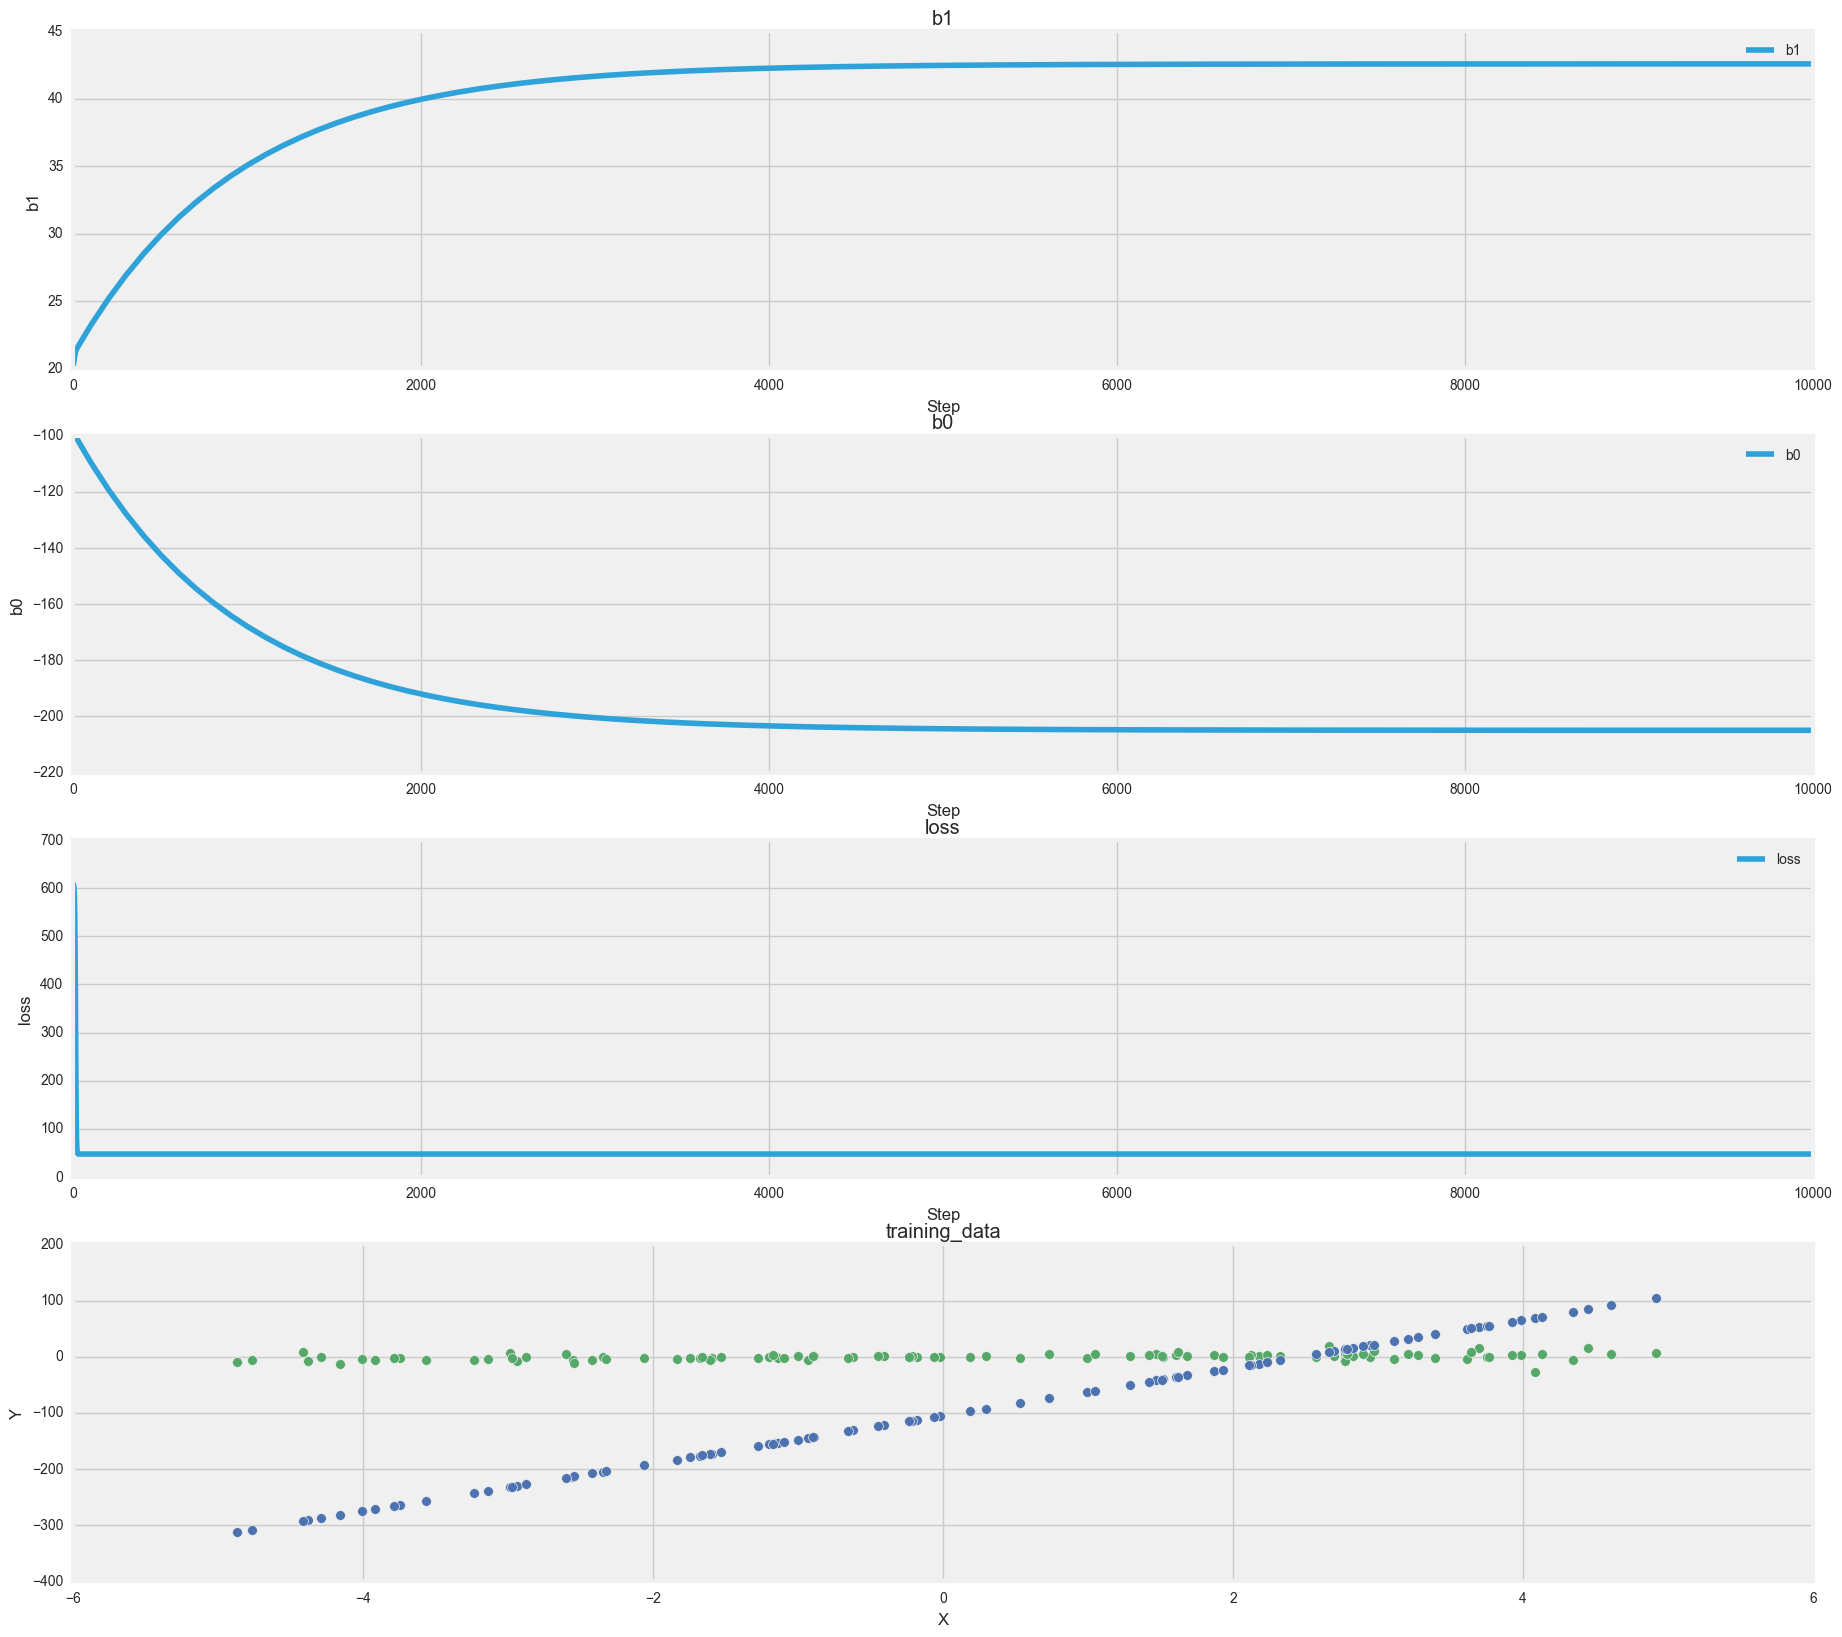

In [25]:
file_index = 1
output = train_glm(file_index)
plot(output)

In [ ]:
output = train_glm(2)
plot(output)